<a href="https://colab.research.google.com/github/ivarela28/Machine-Learning-Notebooks/blob/master/recurrent_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using recurrent neural networks to classify IMBD movie reviews

##SimpleRNN example

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.models import Sequential

max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

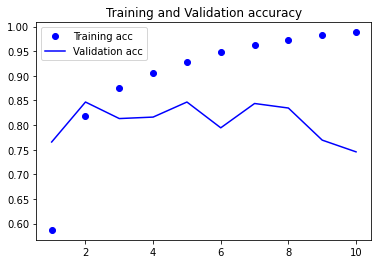

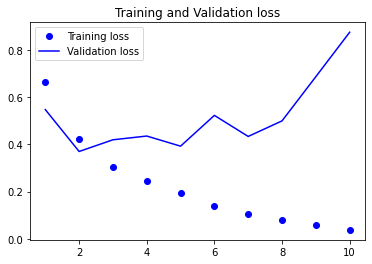

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(stats):
  acc = stats.history['acc']
  val_acc = stats.history['val_acc']
  loss = stats.history['loss']
  val_loss = stats.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and Validation accuracy')
  plt.legend()

  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

plot_loss_acc(history)

##LSTM Example

In [ ]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 8s 25ms/step - loss: 0.4918 - acc: 0.7704 - val_loss: 0.3166 - val_acc: 0.8752
Epoch 2/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2936 - acc: 0.8852 - val_loss: 0.6093 - val_acc: 0.7860
Epoch 3/10
157/157 [==============================] - 3s 21ms/step - loss: 0.2297 - acc: 0.9147 - val_loss: 0.3276 - val_acc: 0.8818
Epoch 4/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2163 - acc: 0.9244 - val_loss: 0.3246 - val_acc: 0.8740
Epoch 5/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1765 - acc: 0.9360 - val_loss: 0.3563 - val_acc: 0.8762
Epoch 6/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1551 - acc: 0.9452 - val_loss: 0.3353 - val_acc: 0.8556
Epoch 7/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1421 - acc: 0.9487 - val_loss: 0.3455 - val_acc: 0.8760
Epoch 8/10
157/157 [==============================] - 3s 22ms/step - 

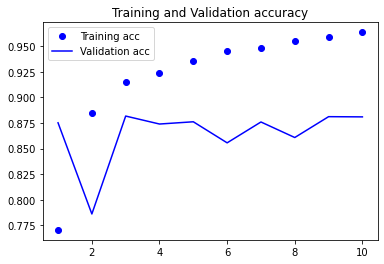

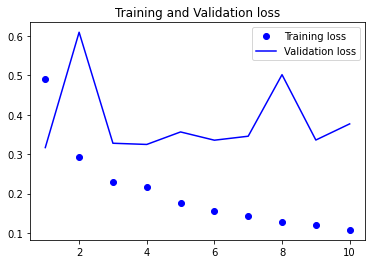

In [ ]:
plot_loss_acc(history)

##Using RNN for weather prediction

In [1]:
from zipfile import ZipFile
file_name = '/content/drive/MyDrive/jena_climate_2009_2016.csv.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [3]:
import os

data_dir = '/content'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


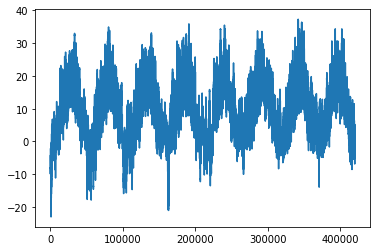

In [7]:
import numpy as np
from matplotlib import pyplot as plt

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(',')[1:]]
  float_data[i, :] = values

temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)



In [11]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [ ]:
LOOKBACK = 720
STEPS = 6
DELAY = 144

def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index